## Homework #3.2 - Linear Regression

### Overview:
In the majority of Machine Learning use-cases, following one or another
form as a Data Scientist, you should create a model that predicts something.
Be it a class, a numerical value, or a sequence of values. In this
task, you will train your first Machine Learning Model - Linear Regression.

### Tasks:
* In this task, we invite you to train 2 models on the selected Data Set
that should predict the target column. The models are the following:
  * the LinearRegression from sklearn.
  * the Lin reg implementation offered in SMLH.

The tasks:
  * Create a Jupyter notebook with a clean code.
  * Study the correlation between features, find the features subset with
the highest correlation with the target column, and try to explain from
the business point of view why they have such a big correlation.
  * Create a second set of data with the columns that have an absolute
correlation between 0.5 and 0.8 with the target column.
  * Split the data into 2 sub-sets using the train test split function from
sklearn.
  * Train a sklearn Linear Regression model on the data provided to
you.
  * Train a from-scratch implementation of Linear Regression on the
train sub-set.
  * Test the models on the test sets from the initial data set. For
error metrics, use the model's 'score' function from the Linear Regression
model.
  * Split the data with the selected columns into 2 sub-sets using the
train test split function from sklearn.
  * Train a sklearn Linear Regression model on the data with selected
columns (train subset).
  * Train a from-scratch implementation of Linear Regression on the
train sub-set.
  * Test the models on the test sets from the initial data set. For
error metrics, use the model's 'score' function from the sklearn Linear
Regression model.
  * Please try to interpret the results you are getting by comparing the
error of the models you created.
  * Please comment on your code.

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I decided to use the Dataset of Used Cars, because it contains a clear Target Column (Price). I will build then a Linear Regression model that will take the best and most suitable
features, and will predict the price based on them.

In [223]:
dataset: pd.DataFrame = pd.read_csv("dataset/used_cars_dataset.csv")

In [224]:
dataset.head(n=5)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.000000
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.000000
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.000000
3,3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-2019],E-Class,4195000.0,25000.0,Diesel,Mumbai,...,1,2.383790e-07,0.000040,0.250000,0.500000,0.010692,0.013563,0.493750,71.604306,71.604306
4,4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,...,0,2.105263e-06,0.000042,0.111111,0.071429,0.127871,0.014269,0.059821,109.150857,0.000000


In [225]:
dataset.tail(n=5)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
1720,1720,1720,2015,Hyundai,Hyundai Eon Era +,Eon,290000.0,38000.0,Petrol,Pune,...,0,3.448276e-06,0.000026,0.166667,0.071429,0.212168,0.008771,0.059821,111.327773,0.0
1721,1721,1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,7500000.0,36000.0,Petrol,Pune,...,0,1.333333e-07,0.000028,0.100000,0.022727,0.004099,0.009283,0.010511,0.399987,0.0
1722,1722,1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,185000.0,142522.0,Diesel,Pune,...,0,5.405405e-06,0.000007,0.076923,0.041667,0.335011,0.002014,0.029687,20.026662,0.0
1723,1723,1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,325000.0,18581.0,Diesel,Pune,...,0,3.076923e-06,0.000054,0.032258,0.041667,0.188859,0.018402,0.029687,103.172958,0.0
1724,1724,1724,2017,Hyundai,Hyundai Creta SX Plus 1.6 AT CRDI,Creta,1395000.0,31028.0,Diesel,Pune,...,0,7.168459e-07,0.000032,0.250000,0.071429,0.040724,0.010842,0.059821,26.412891,0.0


I will work only with basic features, since I have no information about the last columns in the dataset, such as: Distance below 30k km, new and less used, inv_car_price etc. For
the purpose of the task, I will drop these columns. At the same time, I will drop irrelevant columns, such as Full model name and ID columns.

In [226]:
dataset: pd.DataFrame = dataset.drop(columns=["distance below 30k km", "new and less used", "inv_car_price",
                                "inv_car_dist", "inv_car_age", "inv_brand", "std_invprice",
                                "std_invdistance_travelled", "std_invrank", "best_buy1",
                                "best_buy2"])
dataset.head(n=5)

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-2019],E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [227]:
dataset: pd.DataFrame = dataset.drop(columns=["Unnamed: 0", "Id", "full_model_name", "model_name"])
dataset.head(n=5)

,year,brand,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,2016,Honda,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,2012,Nissan,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2017,Toyota,2650000.0,64593.0,Diesel,Thane,1,4.0
3,2017,Mercedes-Benz,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,2012,Hyundai,475000.0,23800.0,Diesel,Mumbai,14,9.0


Since there is brand rank, I can drop the brand column, since it is basically Label Encoded brand column, which in the dataset is under the name "brand_rank". At the same time,
since there is a column for car age, I can drop the Year column, since it is already converted in a smaller range.

In [228]:
dataset: pd.DataFrame = dataset.drop(columns=["brand", "year"])
dataset.head(n=5)

,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2650000.0,64593.0,Diesel,Thane,1,4.0
3,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,475000.0,23800.0,Diesel,Mumbai,14,9.0


In [229]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    1725 non-null   float64
 1   distance_travelled(kms)  1725 non-null   float64
 2   fuel_type                1725 non-null   object 
 3   city                     1725 non-null   object 
 4   brand_rank               1725 non-null   int64  
 5   car_age                  1725 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.0+ KB


In [230]:
dataset.describe()

,price,distance_travelled(kms),brand_rank,car_age
count,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,1.494837e+06,53848.256232,15.731014,5.609275
std,1.671658e+06,44725.541963,12.951122,3.207504
min,6.250000e+04,350.000000,1.000000,0.000000
25%,5.450000e+05,29000.000000,5.000000,3.000000
50%,8.750000e+05,49000.000000,14.000000,5.000000
75%,1.825000e+06,70500.000000,24.000000,8.000000
max,1.470000e+07,790000.000000,81.000000,31.000000


In [231]:
print(dataset.isnull().sum())

price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64


No Null data in the dataset.

In [232]:
print(dataset['fuel_type'].unique())
print(dataset['city'].unique())

['Petrol' 'Diesel' 'Petrol + 1' 'CNG + 1' 'Hybrid']
['Mumbai' 'Thane' 'Dehradun' 'Navi Mumbai' 'Delhi' 'Noida' 'Ghaziabad'
 'Panchkula' 'Faridabad' 'Agra' 'Lucknow' 'Bangalore' 'Hyderabad'
 'Chennai' 'Pune']


Several types of fuel for each car. I will encode those values using Label Encoding, based on the median of the price vs fuel type.

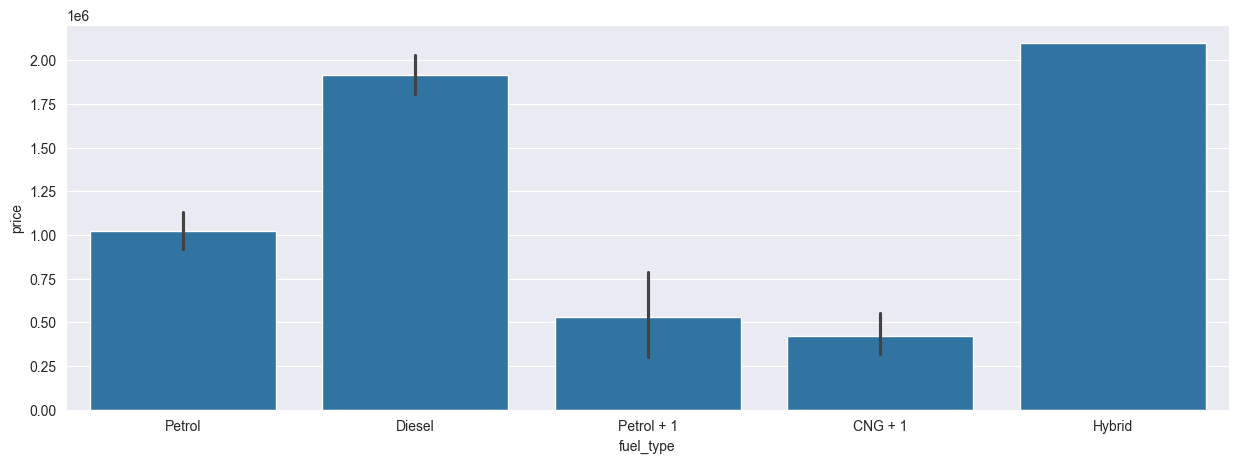

In [233]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, x='fuel_type', y='price')
plt.show()

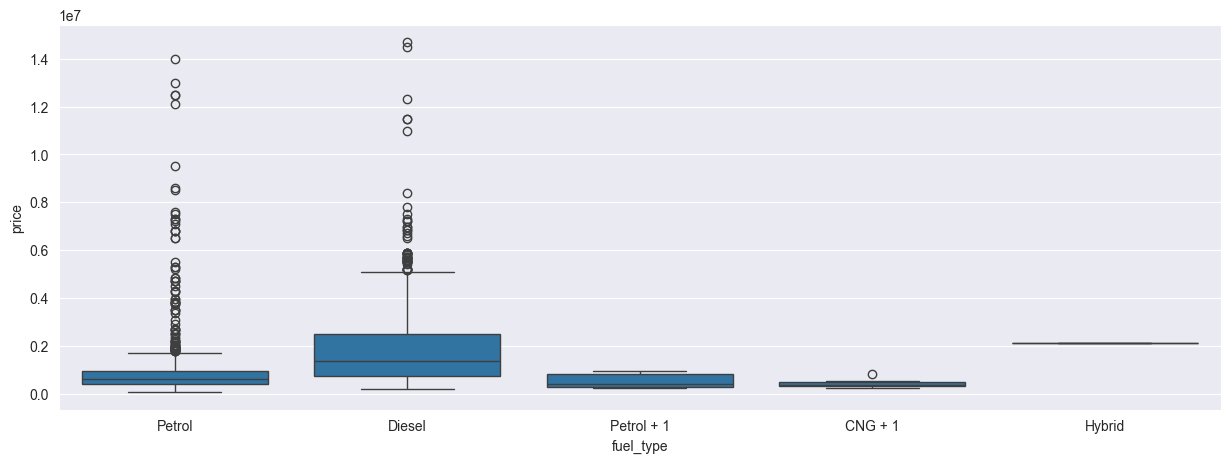

In [234]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=dataset, x='fuel_type', y='price')
plt.show()

Since there are a lot of outliers in the Petrol and Diesel fuel types, it is more useful to use the median in order to obtain the ranking of the fuel types, since it is independent
of the outliers and skewed dataset.

In [235]:
fuel_type_price_median = dataset.groupby("fuel_type")["price"].median()
fuel_type_ranks = fuel_type_price_median.rank(ascending=False, method='min').astype(int)
fuel_type_ranks

fuel_type
CNG + 1       5
Diesel        2
Hybrid        1
Petrol        3
Petrol + 1    4
Name: price, dtype: int64

In [236]:
dataset['fuel_rank'] = dataset['fuel_type'].map(fuel_type_ranks)
dataset.drop(["fuel_type"], axis=1, inplace=True)
dataset

,price,distance_travelled(kms),city,brand_rank,car_age,fuel_rank
0,425000.0,9680.0,Mumbai,7,5.0,3
1,325000.0,119120.0,Mumbai,11,9.0,2
2,2650000.0,64593.0,Thane,1,4.0,2
3,4195000.0,25000.0,Mumbai,2,4.0,2
4,475000.0,23800.0,Mumbai,14,9.0,2
...,...,...,...,...,...,...
1720,290000.0,38000.0,Pune,14,6.0,3
1721,7500000.0,36000.0,Pune,44,10.0,3
1722,185000.0,142522.0,Pune,24,13.0,2
1723,325000.0,18581.0,Pune,24,31.0,2


In [237]:
# dataset = pd.get_dummies(dataset, columns=['fuel_type'], dtype=int)
# dataset

Then, for each City, I will plot the Barplot and Boxplot to identify the distribution of price based on the City.

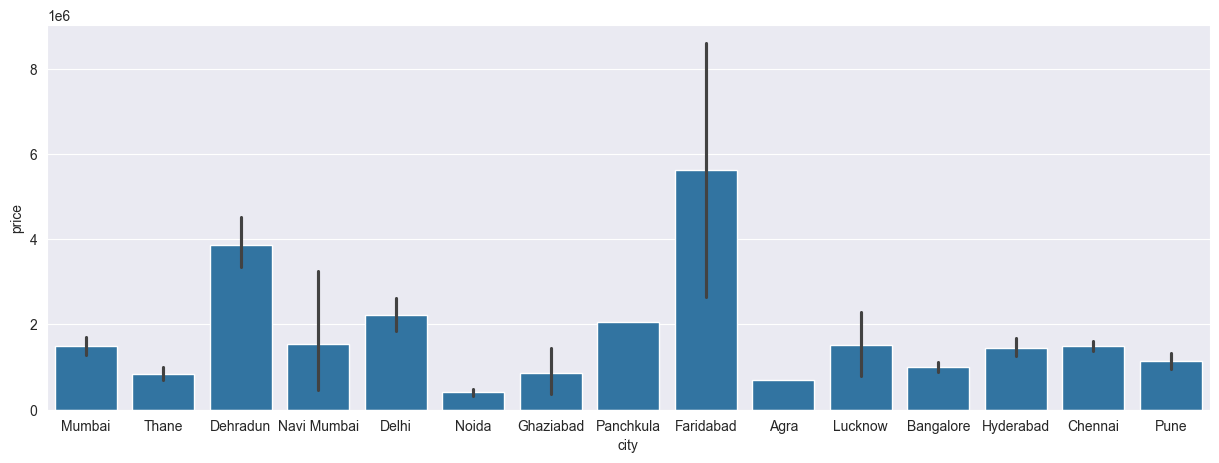

In [238]:
plt.figure(figsize=(15, 5))
sns.barplot(data=dataset, x='city', y='price')
plt.show()

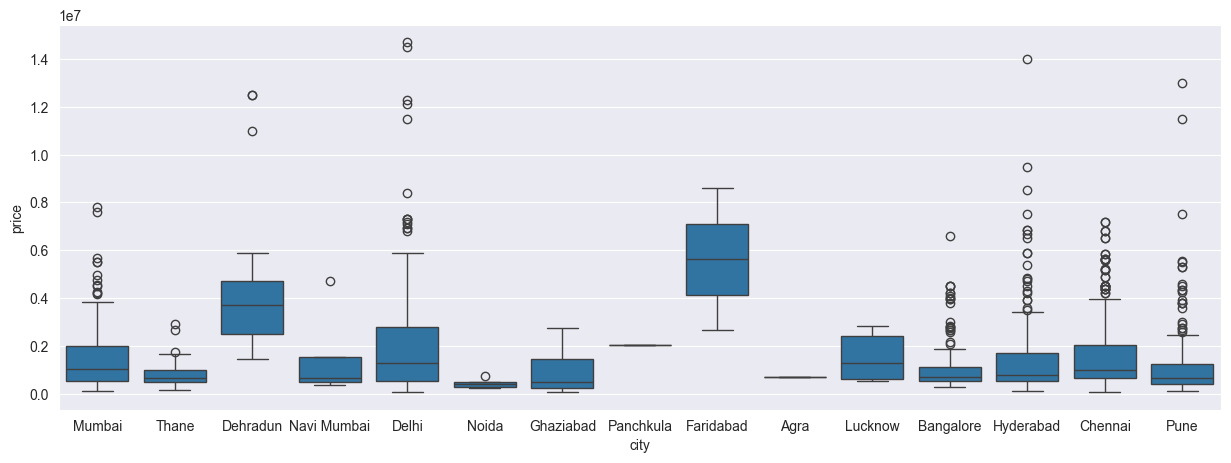

In [239]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=dataset, x='city', y='price')
plt.show()

In [240]:
city_price_median = dataset.groupby("city")["price"].median()
city_ranks = city_price_median.rank(ascending=False, method='min').astype(int)
city_ranks

city
Agra           10
Bangalore       9
Chennai         7
Dehradun        2
Delhi           4
Faridabad       1
Ghaziabad      14
Hyderabad       8
Lucknow         4
Mumbai          6
Navi Mumbai    12
Noida          15
Panchkula       3
Pune           12
Thane          11
Name: price, dtype: int64

In [241]:
dataset['city_rank'] = dataset['city'].map(city_ranks)
dataset.drop(["city"], axis=1, inplace=True)
dataset

,price,distance_travelled(kms),brand_rank,car_age,fuel_rank,city_rank
0,425000.0,9680.0,7,5.0,3,6
1,325000.0,119120.0,11,9.0,2,6
2,2650000.0,64593.0,1,4.0,2,11
3,4195000.0,25000.0,2,4.0,2,6
4,475000.0,23800.0,14,9.0,2,6
...,...,...,...,...,...,...
1720,290000.0,38000.0,14,6.0,3,12
1721,7500000.0,36000.0,44,10.0,3,12
1722,185000.0,142522.0,24,13.0,2,12
1723,325000.0,18581.0,24,31.0,2,12


In [242]:
# dataset = pd.get_dummies(dataset, columns=['city'], dtype=int)
# dataset

In [243]:
dataset.describe()

,price,distance_travelled(kms),brand_rank,car_age,fuel_rank,city_rank
count,1.725000e+03,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,1.494837e+06,53848.256232,15.731014,5.609275,2.477101,7.765217
std,1.671658e+06,44725.541963,12.951122,3.207504,0.534400,2.632555
min,6.250000e+04,350.000000,1.000000,0.000000,1.000000,1.000000
25%,5.450000e+05,29000.000000,5.000000,3.000000,2.000000,7.000000
50%,8.750000e+05,49000.000000,14.000000,5.000000,2.000000,7.000000
75%,1.825000e+06,70500.000000,24.000000,8.000000,3.000000,9.000000
max,1.470000e+07,790000.000000,81.000000,31.000000,5.000000,15.000000


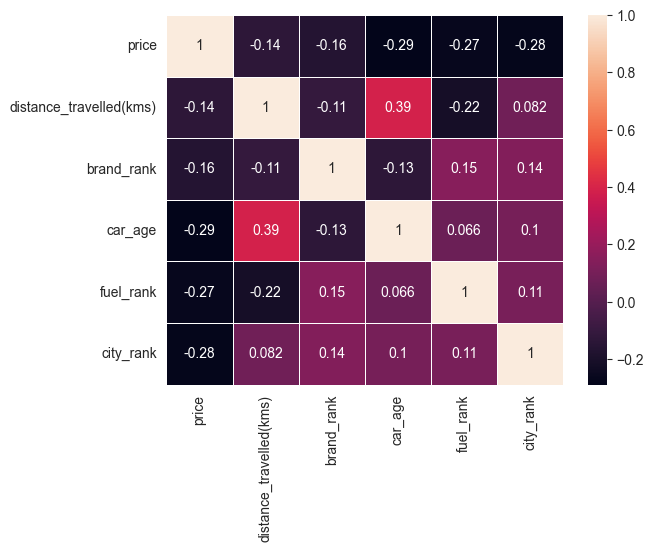

In [244]:
plt.figure()
sns.heatmap(data=dataset.corr(), annot=True, linewidths=0.5, cbar=True)
plt.show()

As it may be seen, the Price is inverse proportionate with:
* Distance Travelled - if a car has more KMs travelled, then it is cheaper,
* Brand Rank - if a car is higher in the brand rank (1, 2), then it is more expensive,
* Car Age - a car is getting cheaper as years go by,
* Fuel Rank - if a Car has a higher ranked fuel, such as Hybrid or Diesel, it is more expensive,
* City Rank - if a Car is located in cities where median of prices is higher, thus in higher ranks of cities, then it is more expensive.

### Linear Regression using Scikit learn library

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

First, I will separate the dataset into Target and Features.

In [246]:
# X_features = dataset.drop(['price', 'car_age', 'fuel_rank', 'brand_rank', 'city_rank'], axis=1)
X_features = dataset.drop(['price'], axis=1)
X_features

,distance_travelled(kms),brand_rank,car_age,fuel_rank,city_rank
0,9680.0,7,5.0,3,6
1,119120.0,11,9.0,2,6
2,64593.0,1,4.0,2,11
3,25000.0,2,4.0,2,6
4,23800.0,14,9.0,2,6
...,...,...,...,...,...
1720,38000.0,14,6.0,3,12
1721,36000.0,44,10.0,3,12
1722,142522.0,24,13.0,2,12
1723,18581.0,24,31.0,2,12


In [247]:
y_target = dataset['price']
y_target

0        425000.0
1        325000.0
2       2650000.0
3       4195000.0
4        475000.0
          ...    
1720     290000.0
1721    7500000.0
1722     185000.0
1723     325000.0
1724    1395000.0
Name: price, Length: 1725, dtype: float64

In [248]:
dataset.corr()['price'].abs().sort_values(ascending=False)

price                      1.000000
car_age                    0.288483
city_rank                  0.277497
fuel_rank                  0.267157
brand_rank                 0.164591
distance_travelled(kms)    0.137351
Name: price, dtype: float64

Next, I will split the entire dataset into 2 categories - Training and Test sets. This is done in order to have a set on which the model will be trained (Training Set) and one on
which the model will be tested (Test Set).

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=43)

In [250]:
X_train

,distance_travelled(kms),brand_rank,car_age,fuel_rank,city_rank
1526,67000.0,3,5.0,2,12
463,8000.0,2,1.0,2,4
1310,53000.0,4,2.0,2,7
1434,57000.0,27,6.0,2,7
1687,49899.0,14,5.0,3,12
...,...,...,...,...,...
16,97679.0,1,5.0,3,6
58,27000.0,4,12.0,3,6
277,68000.0,7,7.0,3,4
255,56567.0,32,8.0,3,4


In [251]:
X_test

,distance_travelled(kms),brand_rank,car_age,fuel_rank,city_rank
1413,4500.0,14,1.0,3,7
1254,38000.0,24,5.0,2,7
393,77000.0,4,6.0,2,2
509,53636.0,24,3.0,2,9
812,45000.0,27,6.0,2,8
...,...,...,...,...,...
400,38000.0,3,2.0,3,15
148,58000.0,24,3.0,2,6
477,58000.0,7,11.0,3,4
1714,90000.0,24,7.0,2,12


In [252]:
y_train

1526     740000.0
463     5600000.0
1310    5190000.0
1434     790000.0
1687     520000.0
          ...    
16      1035000.0
58      1850000.0
277      450000.0
255      215000.0
1344    1350000.0
Name: price, Length: 1207, dtype: float64

In [253]:
y_test

1413    2500000.0
1254     875000.0
393     2350000.0
509     1425000.0
812      620000.0
          ...    
400      495000.0
148      675000.0
477      310000.0
1714     775000.0
1495     397000.0
Name: price, Length: 518, dtype: float64

Next, I will instantiate a LinearRegression Object, that I will train using fit() method, that will find the weights so that they minimize the Cost Function.

In [254]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [255]:
y_hat = linear_regression_model.predict(X_test)
y_hat_train = linear_regression_model.predict(X_train)
y_hat

array([ 2023353.40601367,  1904947.93488632,  2624117.96114093,
        1875218.69292955,  1574231.87872666,  1437228.54823072,
         817259.15878985,  2467732.88750456,  2255879.79590373,
        1905934.33888304,  1202200.39883334,  1559826.03118446,
        2374217.58435264,  1272463.90967572,  1334688.65938426,
         259083.32168476,  3187611.04627222,  1177367.73210514,
          80492.64465665,   342930.67660862,  2130718.75593759,
        2015910.68808068,  1765065.85349436,  1999146.08391806,
        1705277.33792371,  2538734.0688984 ,   190605.91173612,
        1725929.36044346,  1613197.43524313,  2478881.9641185 ,
        1608215.66515087,  1693918.97805508,   999530.61475157,
         938507.97574554,  1161722.9288155 ,  1714259.70717684,
        1482190.81071826,  2534457.91321733,  1684840.32709957,
        2792944.96333237,   963482.74081755,   909462.61281326,
        2717844.98521053,  1399057.33546052,  2297988.31772005,
         798101.92605904,   802918.28811

In [256]:
mean_squared_error(y_hat, y_test), mean_absolute_error(y_hat, y_test)

(2250419557933.39, 879294.920186579)

In [257]:
from sklearn.metrics import r2_score

print(f"Test MSE: {mean_squared_error(y_test, y_hat) / 2}")
print(f"Test R2 Score: {r2_score(y_test, y_hat)}")
print(f"Training MSE: {mean_squared_error(y_train, y_hat_train) / 2}")
print(f"Training R2 Score: {r2_score(y_train, y_hat_train)}")

Test MSE: 1125209778966.695
Test R2 Score: 0.20145615388611304
Training MSE: 1071852734770.2812
Training R2 Score: 0.22941654028353808


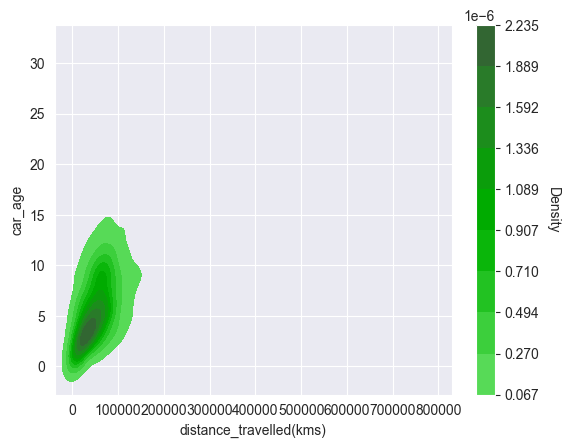

In [258]:
plt.figure()
sns.kdeplot(x='distance_travelled(kms)', y='car_age', data=dataset, color='g', fill=True, alpha=1, cbar=True)
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Density', rotation=270, labelpad=15)
plt.show()

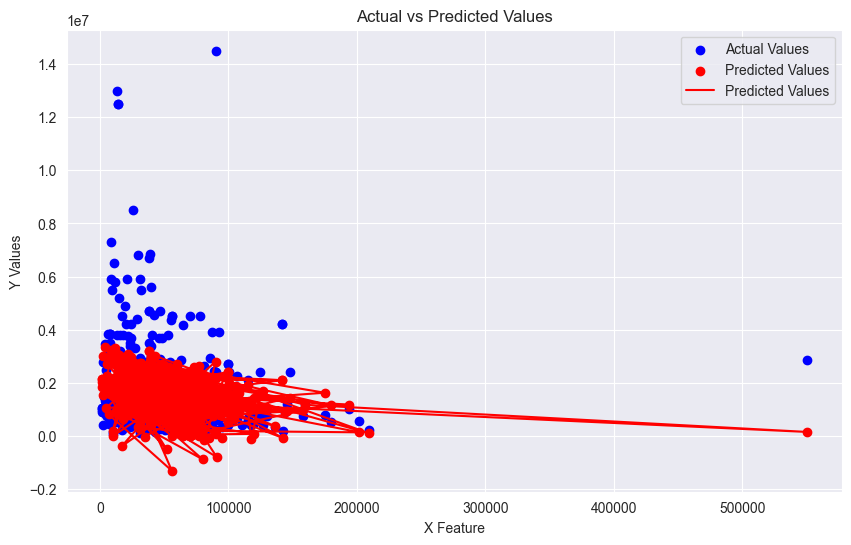

In [259]:
import matplotlib.pyplot as plt

# Assuming X_test is a 1D array or a single feature for simplicity
# If X_test has multiple features, you might want to choose one feature for the x-axis
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.scatter(X_test["distance_travelled(kms)"], y_test, color='blue', label='Actual Values')

# Plot the predicted values
plt.scatter(X_test["distance_travelled(kms)"], y_hat, color='red', label='Predicted Values')

plt.plot(X_test["distance_travelled(kms)"], y_hat, color='red', label='Predicted Values')

# Add labels and title
plt.xlabel('X Feature')
plt.ylabel('Y Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

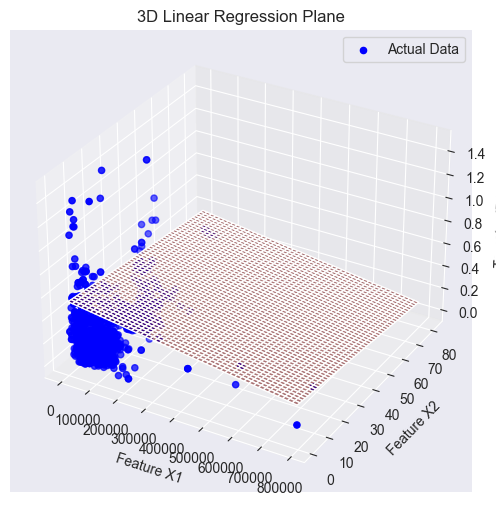

In [260]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract two features and target
X1 = X_features.iloc[:, 0]  # First feature
X2 = X_features.iloc[:, 1]  # Second feature
y = y_target                # Target variable

# Create a meshgrid for the plane
X1_range = np.linspace(X1.min(), X1.max(), 50)
X2_range = np.linspace(X2.min(), X2.max(), 50)
X1_mesh, X2_mesh = np.meshgrid(X1_range, X2_range)

# Compute the predicted y values for the plane
y_pred_plane = (
    linear_regression_model.intercept_ + linear_regression_model.coef_[0] * X1_mesh + linear_regression_model.coef_[1] * X2_mesh
)

# Create a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points
ax.scatter(X1, X2, y, color='blue', label='Actual Data')

# Plot the regression plane
ax.plot_surface(X1_mesh, X2_mesh, y_pred_plane, color='red', alpha=0.5)

# Labels
ax.set_xlabel("Feature X1")
ax.set_ylabel("Feature X2")
ax.set_zlabel("Target y (Price)")
ax.set_title("3D Linear Regression Plane")

plt.legend()
plt.show()


### Linear Regression - SMTH

In [261]:
import math
import numpy as np
class LinearRegressionCustom:
    # Define a Linear Regression class to store our relevant functions in
    def __init__(self):
        """
        Initializes the Linear Regression model.
        It also stores the self.params__ variable,
        which
        will be the weights that the model returns.
        """
        self.params__ = None

    def gradient_descent(self, X, y, learning_rate=0.00001,
                        iterations=500, batch_size=16):
        """
        This function applies the Gradient Descent
        model
        to the dataset
        :param X: numpy.ndarray
        The X matrix containing the independent
        variable columns.
        :param y: numpy.ndarray
        The target vector y.
        """
        # Add a column of ones for the constant term
        X = np.concatenate([X, np.ones_like(y)], axis = 1)
        rows, cols = X.shape
        # Combine the X and y columns to more easily shuffle it later
        X = np.append(X, y, axis=1)
        # Make the initial random guess for w
        w = np.random.random((cols, 1))
        # Go through all the iterations
        for i in range(iterations):
            # Shuffle the rows of the data
            np.random.shuffle(X)
            # Define X and y again
            y_it = X[:, -1].reshape((rows, 1))
            X_it = X[:, :-1]
            # Iterate through the batches
            # for batch in range(math.ceil(rows / batch_size)):
            #     batch_start = batch * batch_size
            #     # Cut a batch from the dataset
            #     x_batch = X_it[batch_start : min(
            #     batch_start + batch_size, X.shape[0])]
            #     y_batch = y_it[batch_start : min(
            #     batch_start + batch_size, X.shape[0])]
            #     # Subtract the gradient from our previous estimation
            #     w -= learning_rate * np.matmul(x_batch.transpose(), (np.matmul(x_batch, w) - y_batch))

            w -= learning_rate * np.matmul(X_it.transpose(), (np.matmul(X_it, w) - y_it))
        self.params__= w
        return self

    def predict(self, X):
        X = np.concatenate([X, np.ones(X.shape[0]).reshape((X.shape[0], 1))], axis=1)
        return np.matmul(X, self.params__)


In [262]:
from sklearn.preprocessing import StandardScaler

X_features = dataset.drop(['price', 'brand_rank', 'city_rank'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=43)
y_train_reshaped = y_train.values.reshape(-1, 1)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [263]:
linear_regression_model = LinearRegressionCustom()
linear_regression_model = linear_regression_model.gradient_descent(X_train_normalized, y_train_reshaped)
y_hat = linear_regression_model.predict(X_test_normalized)
score = r2_score(y_test, y_hat)
score

0.13464146512957842

In [264]:
print(f"Test MSE (CUSTOM LINEAR REGRESSION): {mean_squared_error(y_test, y_hat) / 2}")
print(f"Test R2 Score (CUSTOM LINEAR REGRESSION): {score}")

Test MSE (CUSTOM LINEAR REGRESSION): 1219356821152.7126
Test R2 Score (CUSTOM LINEAR REGRESSION): 0.13464146512957842
